### Import

In [22]:
!pip install wordcloud

In [1]:
import nltk
from wordcloud import WordCloud,stopword
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize,sent_tokenize


In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\traor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Load datasets

In [2]:
positif = pd.read_pickle(r'imdb_raw_pos.pickle')

negatif = pd.read_pickle(r'imdb_raw_neg.pickle')

In [3]:
pos = {'review': positif}

neg = {'review': negatif}

### Create a dataFrame

In [4]:
df1 = pd.DataFrame(pos)
df1['comment'] = 1

In [5]:
df2 = pd.DataFrame(neg)
df2['comment'] = 0

In [6]:
data = pd.concat([df1, df2])
data.head()

,review,comment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


In [7]:
data = data.sample(frac=1).reset_index()

data = data.drop(['index'], axis=1)

In [9]:
data.head()

,review,comment
0,"Aksar is an awful movie. The script, the story...",0
1,Is it possible for a movie to get any worse th...,0
2,This film was incredible! Looked high budget b...,1
3,"Some good set design. Good songs, though like ...",0
4,There's really not a whole lot to say about th...,0


<H2 style='color: cadetblue'> data cleaning </H2>

In [11]:
def html_strip(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_brackets(text):
    return text.replace('\[[^]]*\]', '')

def clean_dataset(text):
    text = html_strip(text)
    text = remove_brackets(text)
    return text

In [12]:
data['review']=data['review'].apply(clean_dataset)

In [13]:
def remove_special_characters(text, remove_digits=True):
    return text.replace('[^a-zA-z0-9\s]', '')

In [14]:
data['review']=data['review'].apply(remove_special_characters)

In [16]:
data['review'].head()

0    Aksar is an awful movie. The script, the story...
1    Is it possible for a movie to get any worse th...
2    This film was incredible! Looked high budget b...
3    Some good set design. Good songs, though like ...
4    There's really not a whole lot to say about th...
Name: review, dtype: object

In [43]:
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')

print(stopwords.words('english'))

In [44]:
#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [45]:
data['review']=data['review'].apply(remove_stopwords)

In [46]:
data['review'].head()

0    Aksar awful movie. script , story , acting sim...
1    possible movie get worse ? ' bunch apes wander...
2    film incredible ! Looked high budget felt hear...
3    good set design. Good songs , though like guy ...
4    ' really whole lot say this. ' really , really...
Name: review, dtype: object

### split dataset with 30% of datasets

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(data.review,data.comment, test_size= 0.3)

In [48]:
print("X_train = " , X_train.shape)
print("X_test = " , X_test.shape)
print("Y_train = " , Y_train.shape)
print("Y_test = " , Y_test.shape)

X_train =  (17500,)
X_test =  (7500,)
Y_train =  (17500,)
Y_test =  (7500,)


### Vectorization

In [49]:
cv=CountVectorizer(stop_words='english', binary=False,ngram_range=(1,1))

In [50]:
cv_train_reviews=cv.fit_transform(X_train)

In [51]:
cv_test_reviews=cv.transform(X_test)

In [52]:
print('BOW_cv_train:',cv_train_reviews.shape)

BOW_cv_train: (17500, 64402)


In [53]:
print('BOW_cv_test:',cv_test_reviews.shape)


BOW_cv_test: (7500, 64402)


In [54]:
print(cv_train_reviews)

  (0, 40198)	2
  (0, 1563)	2
  (0, 52956)	1
  (0, 33424)	1
  (0, 42544)	2
  (0, 33277)	2
  (0, 5985)	1
  (0, 23720)	6
  (0, 50581)	2
  (0, 35982)	1
  (0, 63833)	1
  (0, 21667)	1
  (0, 11624)	1
  (0, 17938)	1
  (0, 46210)	1
  (0, 22873)	2
  (0, 25130)	1
  (0, 8723)	1
  (0, 14333)	1
  (0, 33646)	1
  (0, 18999)	1
  (0, 43380)	1
  (0, 37959)	3
  (0, 18860)	1
  (0, 28425)	1
  :	:
  (17499, 43987)	1
  (17499, 56933)	1
  (17499, 44639)	1
  (17499, 49461)	1
  (17499, 25346)	1
  (17499, 41405)	1
  (17499, 13373)	1
  (17499, 24673)	1
  (17499, 11701)	1
  (17499, 1314)	1
  (17499, 56217)	1
  (17499, 28237)	1
  (17499, 28273)	1
  (17499, 51925)	1
  (17499, 12560)	2
  (17499, 5802)	1
  (17499, 61218)	1
  (17499, 57999)	1
  (17499, 10423)	1
  (17499, 60281)	1
  (17499, 60350)	1
  (17499, 20688)	1
  (17499, 63519)	1
  (17499, 35667)	1
  (17499, 57561)	1


<H2 style="color: blue; text-align:center"> Logistic Regression </H2>

In [55]:
lr=LogisticRegression(max_iter=5000)

In [56]:
cv_train_reviews.shape

(17500, 64402)

In [57]:
Y_train.shape

(17500,)

In [58]:
lr_bow=lr.fit(cv_train_reviews,Y_train)

In [59]:
lr_bow.score(cv_train_reviews, Y_train)

0.9990857142857142

In [84]:
lr_bow.score(cv_test_reviews, Y_test)

0.8813333333333333

### Top 10 words

In [85]:
coeff = lr_bow.coef_

In [86]:
sort = np.argsort(abs(coeff))

In [63]:
sort

array([[16453, 56667, 53894, ...,  4490, 63482, 62151]], dtype=int64)

In [64]:
sort = sort[0][::-1][:10]

In [65]:
sort

array([62151, 63482,  4490, 56836, 32413, 16146, 20423, 19822, 41844,
       22870], dtype=int64)

In [66]:
list_index = []
for i in sort :
    list_index.append(i)

In [67]:
list_index

[62151, 63482, 4490, 56836, 32413, 16146, 20423, 19822, 41844, 22870]

In [68]:
words = []
for i in list_index:
    words.append(list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(i)])    

In [87]:
words

['waste',
 'worst',
 'awful',
 'terrible',
 'lame',
 'disappointing',
 'fails',
 'excellent',
 'pathetic',
 'funniest']

### Predict

In [70]:
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)

[0 1 1 ... 0 0 0]


### Accuracy of the model

In [71]:
lr_bow_score=accuracy_score(Y_test,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

lr_bow_score : 0.8813333333333333


### The classification report

In [72]:
lr_bow_report=classification_report(Y_test,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

              precision    recall  f1-score   support

    Positive       0.89      0.88      0.88      3821
    Negative       0.87      0.89      0.88      3679

    accuracy                           0.88      7500
   macro avg       0.88      0.88      0.88      7500
weighted avg       0.88      0.88      0.88      7500



### confusion matrix

In [88]:
cm_bow=confusion_matrix(Y_test,lr_bow_predict,labels=[1,0]/np.sum(confusion_matrix(Y_test,lr_bow_predict,labels=[1,0]
)))

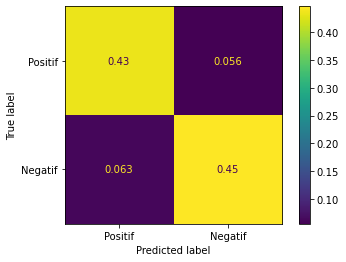

In [90]:
cm_bow=confusion_matrix(Y_test,lr_bow_predict,labels=[1,0])/np.sum(confusion_matrix(Y_test,lr_bow_predict,labels=[1,0]))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bow, display_labels=['Positif', 'Negatif'])
disp.plot()